In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Data/Raw/heart_disease.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# T-test

In [4]:
group_0 = df[df['HeartDisease'] == 0]  # healthy
group_1 = df[df['HeartDisease'] == 1]  # disease


In [5]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [6]:
results = []

for col in numeric_cols:
    t_stat, p_value = stats.ttest_ind(
        group_0[col],
        group_1[col],
        equal_var=False  # safer (Welch's t-test)
    )
    
    results.append([col, t_stat, p_value])

t_test_results = pd.DataFrame(results, columns=['Feature', 'T-statistic', 'P-value'])
t_test_results


,Feature,T-statistic,P-value
0,Age,-8.822540,6.348337e-18
1,RestingBP,-3.339492,8.732265e-04
2,Cholesterol,7.626851,6.481236e-14
3,MaxHR,13.231478,1.430637e-36
4,Oldpeak,-14.040031,1.902722e-40


* A p-value below 0.05 indicates statistical significance.

* Sick patients are older (Expected);
* Sick patients have higher BP (Expected);
* The average cholesterol is higher in the healthy group (not expected since high cholesterol can translate in to heart problems, need to check relationships);
* Healthy patients reach higher heart rate (Expected);
* Sick patients have higher ST depression (induced by exercise, also expected in heart disease).

## Relationships with Cholesterol

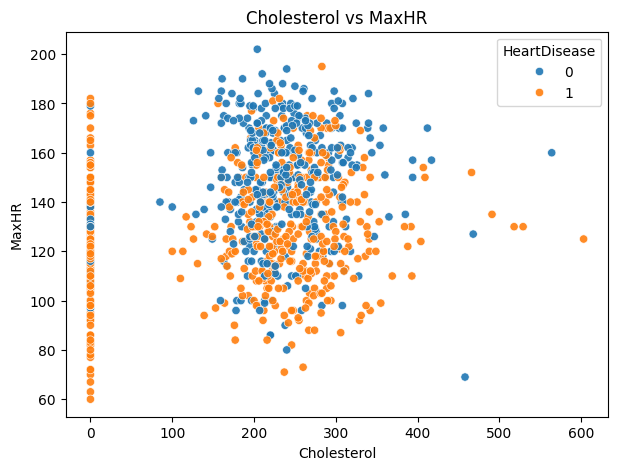

In [7]:
# MaxHR vs Cholesterol
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Cholesterol',
    y='MaxHR',
    hue='HeartDisease',
    alpha=0.9
)
plt.title('Cholesterol vs MaxHR')
plt.show()

* 0 = Healthy patients
* 1 = Heart Disease patients

* Cholesterol has no correlation with Heart rate but with this scatter plot we can see the tail of high cholesterol being bigger in the Healthy group, confirming the T-test assumption.

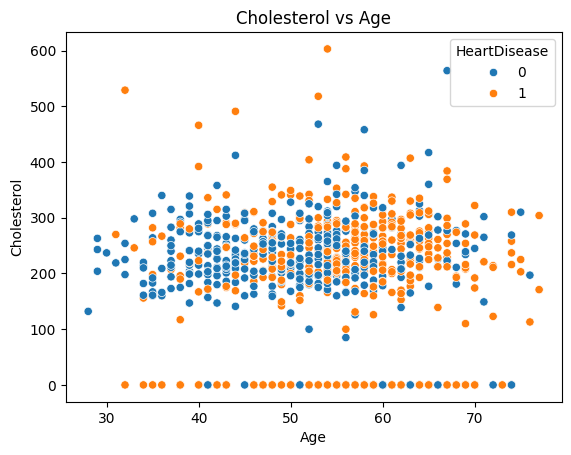

In [8]:
# Age vs Cholesterol 
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='HeartDisease')
plt.title('Cholesterol vs Age')
plt.show()


* 0 = Healthy patients
* 1 = Heart Disease patients

* Some disease outliers with high cholesterol from 30 to 60 years old as expected;
* Confirmed that older people have more heart diseases.
* Older people also have heart diseases with acceptable cholesterol levels.

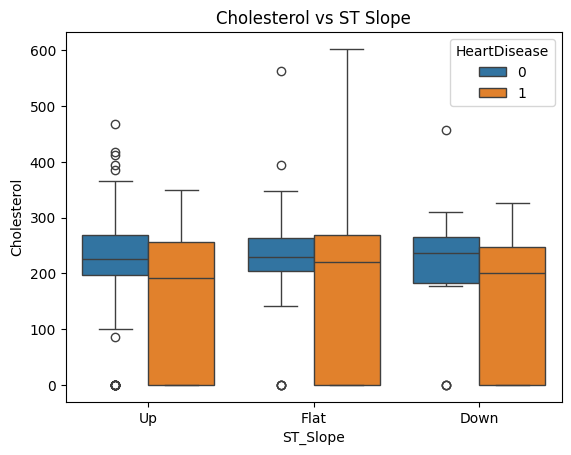

In [9]:
# Cholesterol vs ST_Slope
sns.boxplot(data=df, x='ST_Slope', y='Cholesterol', hue='HeartDisease')
plt.title('Cholesterol vs ST Slope')
plt.show()


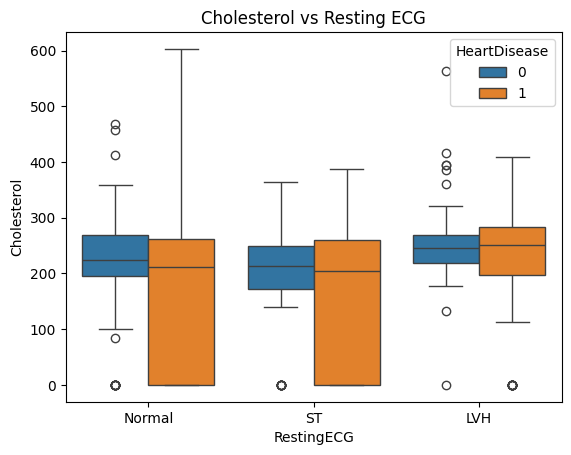

In [10]:
# Cholesterol vs RestingECG
sns.boxplot(data=df, x='RestingECG', y='Cholesterol', hue='HeartDisease')
plt.title('Cholesterol vs Resting ECG')
plt.show()


* Sick patients have cholesterol levels below 300 -> This confirms that most cholesterol data is after diagnosis which induces medication and lowers cholesterol levels for sick patients.
* Thats why T-test shows average high cholesterol levels on healthy patients.